Predict whether a loan applicant will get loan approval (Loan_Status) based on applicant and loan features. The dataset includes demographic, financial, and credit history information.

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
# Suppress warnings for clean output
warnings.filterwarnings('ignore')

# Set Seaborn style for plots
sns.set(style='whitegrid')

In [2]:
# Dataset folder
base_path = '/kaggle/input/loan-prediction-dataset'

# Detect file automatically
file_name = os.listdir(base_path)[0]  # Takes first file in folder
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Shape and columns
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

# Info
df.info()


Dataset shape: (614, 13)
Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null

In [4]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)


In [6]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


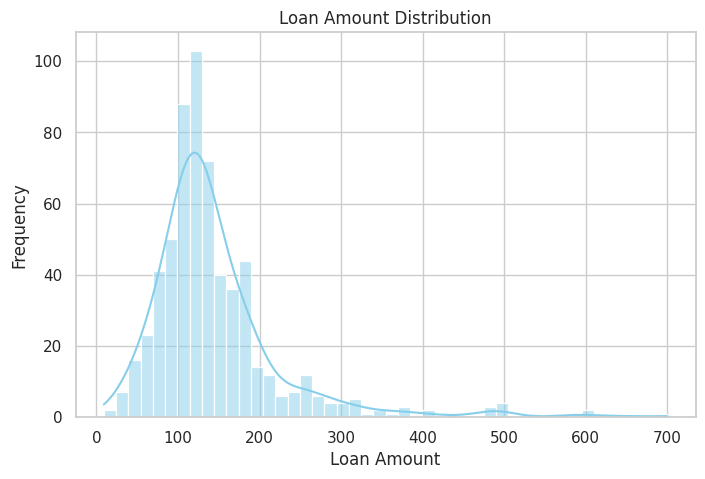

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], kde=True, color='skyblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


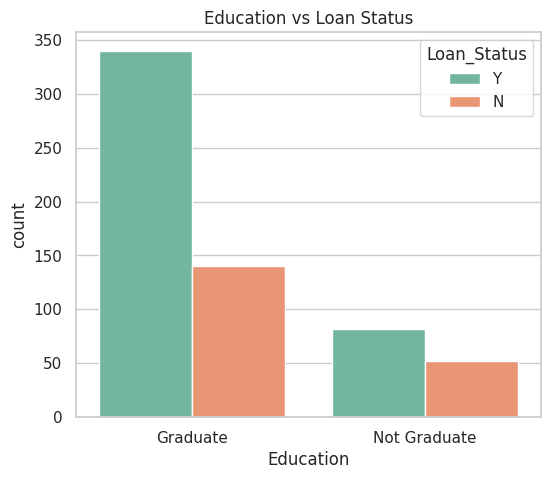

In [8]:
plt.figure(figsize=(6,5))
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='Set2')
plt.title('Education vs Loan Status')
plt.show()


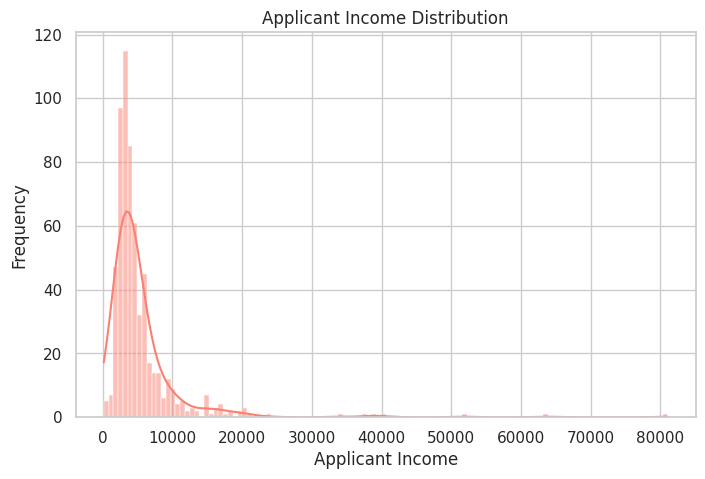

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['ApplicantIncome'], kde=True, color='salmon')
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()


In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,False,False,...,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True


In [11]:
X = df_encoded.drop('Loan_Status_Y', axis=1)
y = df_encoded['Loan_Status_Y']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7886178861788617


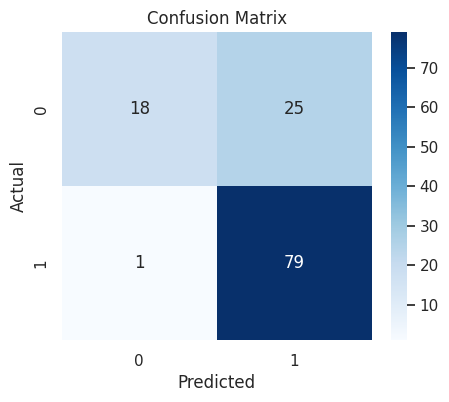

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression achieved 78.86% accuracy in predicting loan approval. Key factors affecting loan approval include Credit History, Applicant Income, and Education. Further improvement can be achieved using other models like Decision Trees or ensemble methods.